<a href="https://colab.research.google.com/github/gorleramyasri/Leaf-disease-detection/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
  pip install pyyaml h5py  # Required to save models in HDF5 format

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
path1='/content/gdrive/MyDrive/ML/TLDDM/TLDD/Dataset'

In [ ]:
import pandas as pd
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os


In [ ]:
DATASET="train"
DATASET2="valid"


In [ ]:
CATEGORIES=["Tomato___Bacterial_spot","Tomato___Early_blight","Tomato___healthy","Tomato___Late_blight","Tomato___Leaf_Mold","Tomato___Septoria_leaf_spot","Tomato___Spider_mites Two-spotted_spider_mite","Tomato___Target_Spot","Tomato___Tomato_mosaic_virus","Tomato___Tomato_Yellow_Leaf_Curl_Virus"]

train_data=[]

In [ ]:
for category in CATEGORIES:
        label=CATEGORIES.index(category) ## 0 for tbs.... labelling
        path=os.path.join(path1,DATASET,category)
        for img_file in os.listdir(path):
            img=cv.imread(os.path.join(path,img_file),1)
            #print(img,type(img))
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            img=cv.resize(img,(64,64))
            train_data.append([img,label])

In [ ]:

test_data=[]

for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(path1,DATASET2,category)
        for img_file in os.listdir(path):
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            img=cv.resize(img,(64,64))
            test_data.append([img,label])

In [ ]:
import random

random.shuffle(train_data)
random.shuffle(test_data)

for lbl in train_data[:10]:
    print(lbl[1])

2
3
3
6
1
9
5
6
7
3


In [ ]:
X_train=[]
y_train=[]

for features,label in train_data:
    X_train.append(features)
    y_train.append(label)

Y=[]
for i in y_train:
    if i==0:
        Y.append("BACTERIAL SPOT")
    elif i==1:
        Y.append("EARLY BLIGHT")
    elif i==2:
        Y.append("HEALTHY")
    elif i==3:
        Y.append("LATE BLIGHT")
    elif i==4:
        Y.append("LEAF MOLD")
    elif i==5:
        Y.append("SEPTORIA LEAF SPOT")
    elif i==6:
        Y.append("SPIDER MITE")
    elif i==7:
        Y.append("TARGET SPOT")
    elif i==8:
        Y.append("MOSAIC VIRUS")
    else:
        Y.append("YELLOW LEAF CURL VIRUS")

len(X_train),len(y_train)

(0, 0)

In [ ]:
X_test=[]
y_test=[]

for features,label in test_data:
    X_test.append(features)
    y_test.append(label)

Z=[]
for i in y_test:
    if i==0:
        Z.append("BACTERIAL SPOT")
    elif i==1:
        Z.append("EARLY BLIGHT")
    elif i==2:
        Z.append("HEALTHY")
    elif i==3:
        Z.append("LATE BLIGHT")
    elif i==4:
        Z.append("LEAF MOLD")
    elif i==5:
        Z.append("SEPTORIA LEAF SPOT")
    elif i==6:
        Z.append("SPIDER MITE")
    elif i==7:
        Z.append("TARGET SPOT")
    elif i==8:
        Z.append("MOSAIC VIRUS")
    else:
        Z.append("YELLOW LEAF CURL VIRUS")

len(X_test),len(y_test)

In [ ]:

X_train=np.array(X_train).reshape(-1,64,64,3)
X_train=X_train/255.0
X_train.shape

X_test=np.array(X_test).reshape(-1,64,64,3)
X_test=X_test/255.0
X_test.shape

order=['BACTERIAL SPOT','EARLY BLIGHT','HEALTHY','LATE BLIGHT','LEAF MOLD','SEPTORIA LEAF SPOT','SPIDER MITE','TARGET SPOT','MOSAIC VIRUS','YELLOW LEAF CURL VIRUS']

In [ ]:
from keras.utils import to_categorical

one_hot_train=to_categorical(y_train)
one_hot_train

one_hot_test=to_categorical(y_test)
one_hot_test

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout

classifier=Sequential()

classifier.add(Conv2D(32,(3,3), input_shape=(64,64,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.2))

classifier.add(Conv2D(64,(3,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.2))

classifier.add(Conv2D(128,(3,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.4))

classifier.add(Flatten())

classifier.add(Dense(activation='relu', units=64))
classifier.add(Dense(activation='relu', units=128))
classifier.add(Dense(activation='relu', units=64))
classifier.add(Dense(activation='softmax', units=10))

classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 64)        0

In [ ]:

# Create and train a new model instance.
#model = create_model()
classifier.fit(X_train,one_hot_train,epochs=75,batch_size=128,validation_split=0.2)
path2= "/content/gdrive/MyDrive/ML/TLDDM/TLDD/weights/"

# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
classifier.save(path2+'my_model.h5')

Epoch 1/75
115/115 [==============================] - 16s 36ms/step - loss: 1.8944 - accuracy: 0.2970 - val_loss: 1.3356 - val_accuracy: 0.5484
Epoch 2/75
115/115 [==============================] - 3s 22ms/step - loss: 1.0218 - accuracy: 0.6422 - val_loss: 0.8055 - val_accuracy: 0.7188
Epoch 3/75
115/115 [==============================] - 3s 23ms/step - loss: 0.6832 - accuracy: 0.7602 - val_loss: 0.5899 - val_accuracy: 0.7970
Epoch 4/75
115/115 [==============================] - 3s 22ms/step - loss: 0.5558 - accuracy: 0.7995 - val_loss: 0.5495 - val_accuracy: 0.8152
Epoch 5/75
115/115 [==============================] - 3s 23ms/step - loss: 0.4707 - accuracy: 0.8336 - val_loss: 0.4194 - val_accuracy: 0.8582
Epoch 6/75
115/115 [==============================] - 3s 25ms/step - loss: 0.4089 - accuracy: 0.8530 - val_loss: 0.4154 - val_accuracy: 0.8584
Epoch 7/75
115/115 [==============================] - 3s 23ms/step - loss: 0.3652 - accuracy: 0.8709 - val_loss: 0.3805 - val_accuracy: 0.864

In [ ]:
path2= "/content/gdrive/MyDrive/ML/TLDDM/TLDD/weights/"
path2+'my_model.h5'

'/content/gdrive/MyDrive/ML/TLDDM/TLDD/weights/my_model.h5'

In [ ]:
import tensorflow as tf
from tensorflow import keras
new_model = tf.keras.models.load_model(path2+'my_model.h5')

# Show the model architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 64)        0

In [ ]:
from keras.utils import to_categorical
one_hot_test=to_categorical(y_test)
one_hot_test
test_loss,test_acc=new_model.evaluate(X_test,one_hot_test)
test_loss,test_acc

145/145 [==============================] - 7s 5ms/step - loss: 0.2090 - accuracy: 0.9415


(0.20904186367988586, 0.9414951205253601)

In [ ]:
def classname(i):
  switcher = {
      0:"BACTERIAL SPOT",
      1:"EARLY BLIGHT",
      2:"HEALTHY",
      3:"LATE BLIGHT",
      4:"LEAF MOLD",
      5:"SEPTORIA LEAF SPOT",
      6:"SPIDER MITE",
      7:"TARGET SPOT",
      8:"MOSAIC VIRUS",
      9:"YELLOW LEAF CURL VIRUS"
        }
  return switcher.get(i,"nothing")


In [ ]:
path="/content/gdrive/MyDrive/ML/TLDDM/TLDD/Dataset/Random/tmt2.jpg"
img1=cv.imread(path,1)
img=cv.cvtColor(img1,cv.COLOR_BGR2RGB)
img=cv.resize(img,(64,64))

In [ ]:

img=np.array(img).reshape(-1,64,64,3)
#print(img,img.shape)
img=img/255.0
#print("image",img,img.shape)

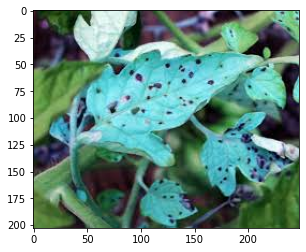

In [ ]:
plt.imshow(img1)

In [ ]:
y_pred=np.argmax(new_model.predict(img))
y_pred
classname(y_pred)

1/1 [==============================] - 0s 19ms/step


'SEPTORIA LEAF SPOT'

In [ ]:
from keras.applications.resnet50 import ResNet50